# EDA worldcupplyears

In [34]:
##import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
pd.set_option('display.max_columns',None)

In [35]:
## import data set

Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/FIFA WORLD CUP ANALYSIS PROJECT/Data/New_Worldcupplayers.csv')
Data.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,Unknown,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,Unknown,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,Unknown,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX


# Examine player positions

In [36]:
# Count players by position
position_counts = Data['Position'].value_counts().reset_index()
position_counts.columns = ['position', 'count']

In [37]:
Data['Line-up'].value_counts().index

Index(['N', 'S'], dtype='object')

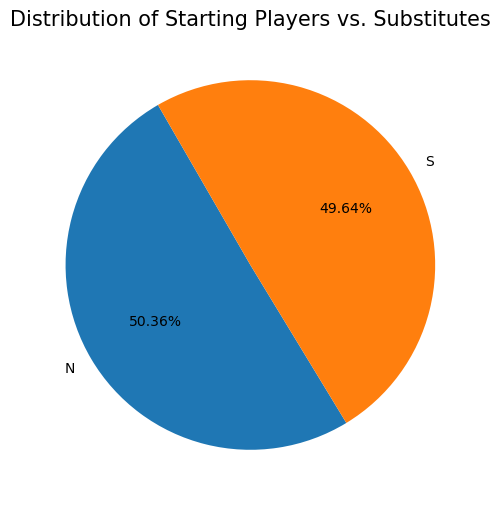

In [66]:
### find players percentage by line up using pie plot 
plt.figure(figsize=(8, 6))
plt.pie(Data['Line-up'].value_counts().values, labels= Data['Line-up'].value_counts().index, autopct= '%0.2f%%',startangle=120)
plt.title('Distribution of Starting Players vs. Substitutes', fontsize = 15 )
plt.show()

# Top Ten most Goal Scorer 

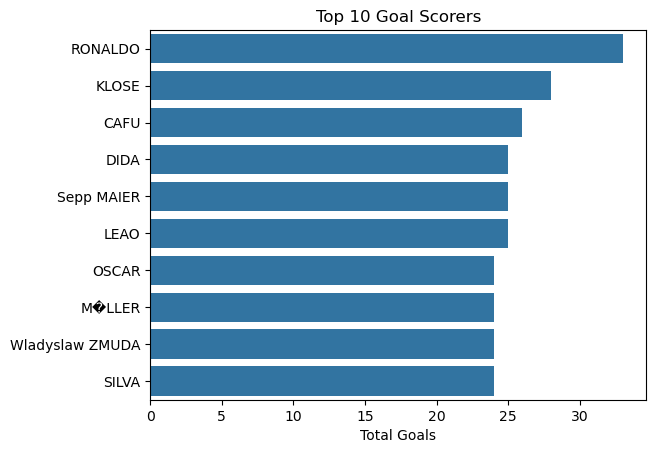

In [39]:
### create a variable top_10_soorer 
top_10_scorer = Data['Player Name'].value_counts().sort_values(ascending= False).reset_index().head(10)
##Rename column name
top_10_scorer.columns = ['Player Name', 'tot_goals']

### Plot visualization

sns.barplot(data= top_10_scorer, x = 'tot_goals', y = 'Player Name')
plt.title('Top 10 Goal Scorers')
plt.ylabel('')
plt.xlabel('Total Goals')
plt.show()

## Analyze coach impact by examining teams’ performances under different coaches.

In [40]:
# Create a helper column for match result (win/loss/draw) for each team
df = Data.copy()
df['home_team_win'] = df['Home Team Goals'] > df['Away Team Goals']
df['away_team_win'] = df['Away Team Goals'] > df['Home Team Goals']
df['draw'] = df['Home Team Goals'] == df['Away Team Goals']


In [41]:
# Home team data
home_data = df[['Coach Name', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'home_team_win', 'draw', 'Year']].copy()
home_data['team'] = home_data['Home Team Name']
home_data['goals_scored'] = home_data['Home Team Goals']
home_data['goals_conceded'] = home_data['Away Team Goals']
home_data['win'] = home_data['home_team_win']

# Away team data
away_data = df[['Coach Name', 'Away Team Name', 'Away Team Goals', 'Home Team Goals', 'away_team_win', 'draw', 'Year']].copy()
away_data['team'] = away_data['Away Team Name']
away_data['goals_scored'] = away_data['Away Team Goals']
away_data['goals_conceded'] = away_data['Home Team Goals']
away_data['win'] = away_data['away_team_win']

# Combine both dataframes
team_performance = pd.concat([home_data, away_data])



In [42]:
# Aggregate performance metrics for each coach
coach_performance = team_performance.groupby(['Coach Name', 'team']).agg(
    win_rate=('win', 'mean'),  # Percentage of wins
    avg_goals_scored=('goals_scored', 'mean'),
    avg_goals_conceded=('goals_conceded', 'mean'),
    total_matches=('win', 'count')
).reset_index()
coach_performance['avg_goals_scored'] = coach_performance['avg_goals_scored'].astype(int)
# Convert win rate to percentage
coach_performance['win_rate'] = coach_performance['win_rate'] * 100




In [43]:
coach_performance = coach_performance[coach_performance['total_matches'] > 5]  # Example threshold


In [44]:
coach_performance = coach_performance[coach_performance['win_rate'] == 100].sort_values(by = 'avg_goals_scored', ascending= False).head(10)



/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_67841/2545744906.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coaches, x='avg_goals_scored', y='Coach Name', palette= 'dark:b')


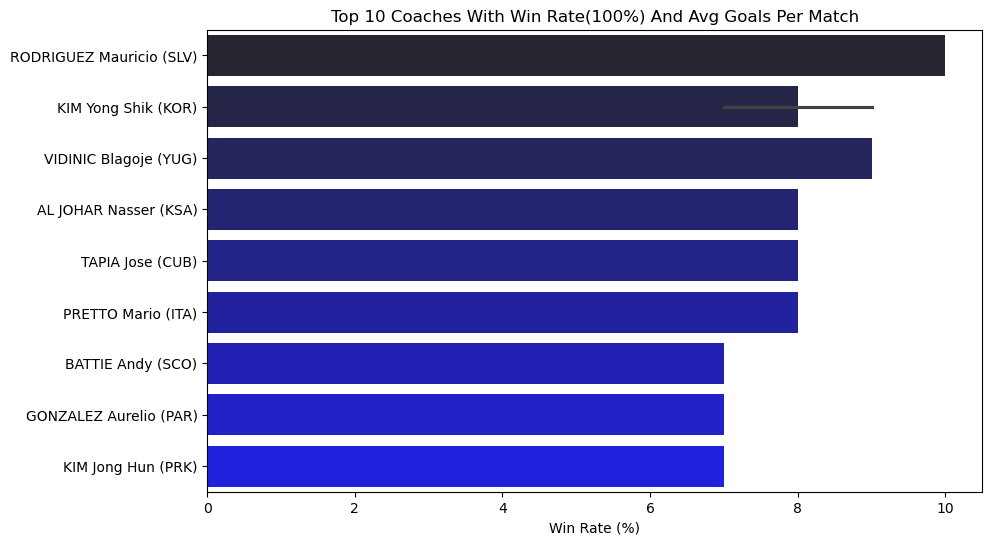

In [45]:
top_coaches = coach_performance.sort_values(by='win_rate', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_coaches, x='avg_goals_scored', y='Coach Name', palette= 'dark:b')
plt.title('Top 10 Coaches With Win Rate(100%) And Avg Goals Per Match')
plt.xlabel('Win Rate (%)')
plt.ylabel('')
plt.show()

## Best Goal Keeper

In [46]:
# Filter rows where Position is 'Goalkeeper'
df = Data.copy()
goalkeepers = df[df['Position'] == 'GK']


In [47]:
# Goals conceded by goalkeepers playing as the home team
home_goalkeepers = goalkeepers.merge(df[['MatchID', 'Home Team Goals', 'Away Team Goals', 'Home Team Initials']], 
                                     left_on=['MatchID', 'Team Initials'], 
                                     right_on=['MatchID', 'Home Team Initials'], 
                                     how='inner')

home_goalkeepers['goals_conceded'] = home_goalkeepers['Away Team Goals_y']

# Goals conceded by goalkeepers playing as the away team
away_goalkeepers = goalkeepers.merge(df[['MatchID', 'Home Team Goals', 'Away Team Goals', 'Away Team Initials']], 
                                     left_on=['MatchID', 'Team Initials'], 
                                     right_on=['MatchID', 'Away Team Initials'], 
                                     how='inner')
away_goalkeepers['goals_conceded'] = away_goalkeepers['Home Team Goals_y']

# Combine home and away goalkeepers data
all_goalkeepers = pd.concat([home_goalkeepers, away_goalkeepers])


In [48]:
# Aggregate by goalkeeper to find total goals conceded and number of matches
goalkeeper_stats = all_goalkeepers.groupby(['Player Name', 'Team Initials']).agg(
    total_goals_conceded=('goals_conceded', 'sum'),
    matches_played=('MatchID', 'count')
).reset_index()

# Calculate goals conceded per match
goalkeeper_stats['goals_conceded_per_match'] = goalkeeper_stats['total_goals_conceded'] / goalkeeper_stats['matches_played']


In [53]:
best_goalkeepers = goalkeeper_stats.sort_values(by='goals_conceded_per_match').head(10)


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_67841/1993061381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_goalkeepers, x='goals_conceded_per_match', y='Player Name', palette='dark:b')


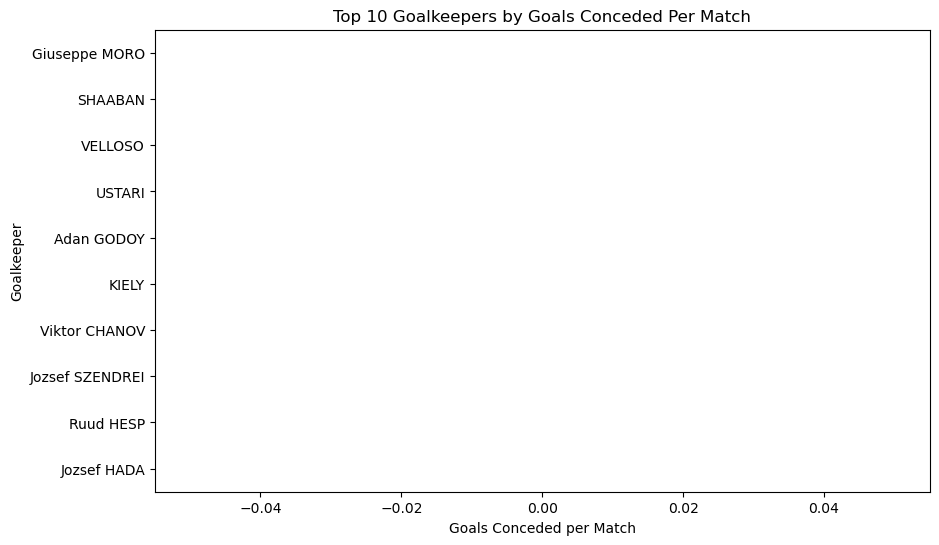

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_goalkeepers, x='goals_conceded_per_match', y='Player Name', palette='dark:b')
plt.title('Top 10 Goalkeepers by Goals Conceded Per Match')
plt.xlabel('Goals Conceded per Match')
plt.ylabel('Goalkeeper')
plt.show()

N    18656
S    18392
Name: Line-up, dtype: int64
N    50.356295
S    49.643705
Name: Line-up, dtype: float64


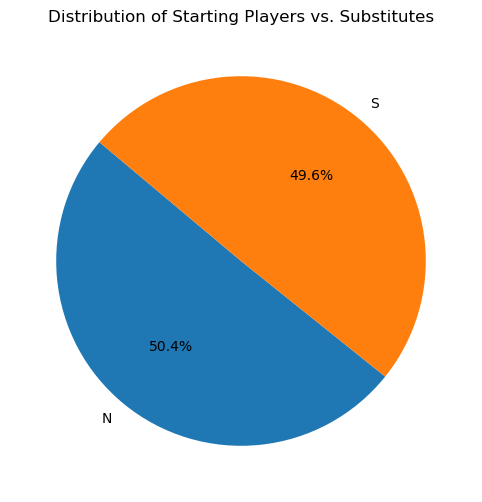

In [57]:
df = Data.copy()

# Count each 'Line-up' status
lineup_distribution = df['Line-up'].value_counts()
print(lineup_distribution)

lineup_proportion = df['Line-up'].value_counts(normalize=True) * 100
print(lineup_proportion)


# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(lineup_distribution, labels=lineup_distribution.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Starting Players vs. Substitutes')
plt.show()
